#### Description:

This file compares Multi-Objective Genetic Algorithm (MOGA) parameters. This involves testing

1. If object weights matter absolutely, or if they can be compared relatively (all 0.1 vs all 1.0)
2. the optimal weights for the objective functions, relative to prediction_weight (0.5)
3. divergence_methods and diversity_methods
4. and evaluating the DEAP MOGA selection methods.

In [1]:
import numpy as np

from GA.MogaGeneticAlgorithm import MogaGeneticAlgorithm
from GA.Operators.MogaSelectionMethod import MogaSelectionMethod
from function_module import *
import moga_function_module

In [2]:
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'selection_method': 'selLexicase',
    'seed': 0,
}
target_expressions = [0, 0.5, 1]
lineages = 10
test_cases = 11

In [3]:
# Evaluate non dominant selection methods
param_ranges = {
    'prediction_weight' : [1.0],
    'divergence_weight' : [1.0],
    'diversity_weight' : [1.0],
    'selection_method' : ['selNSGA2', 'selNSGA3', 'selNSGA3WithMemory', 'selSPEA2', 'sortNondominated', 'sortLogNondominated',
                          'selTournamentDCD', 'uniform_reference_points'],
}
results_df = moga_function_module.test_params(param_ranges, target_expressions, lineages, kwargs)

Processing combinations:   0%|          | 0/240 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 240/240 [25:47<00:00,  6.45s/it, Elapsed=25.79min, ETA=0.00s]   


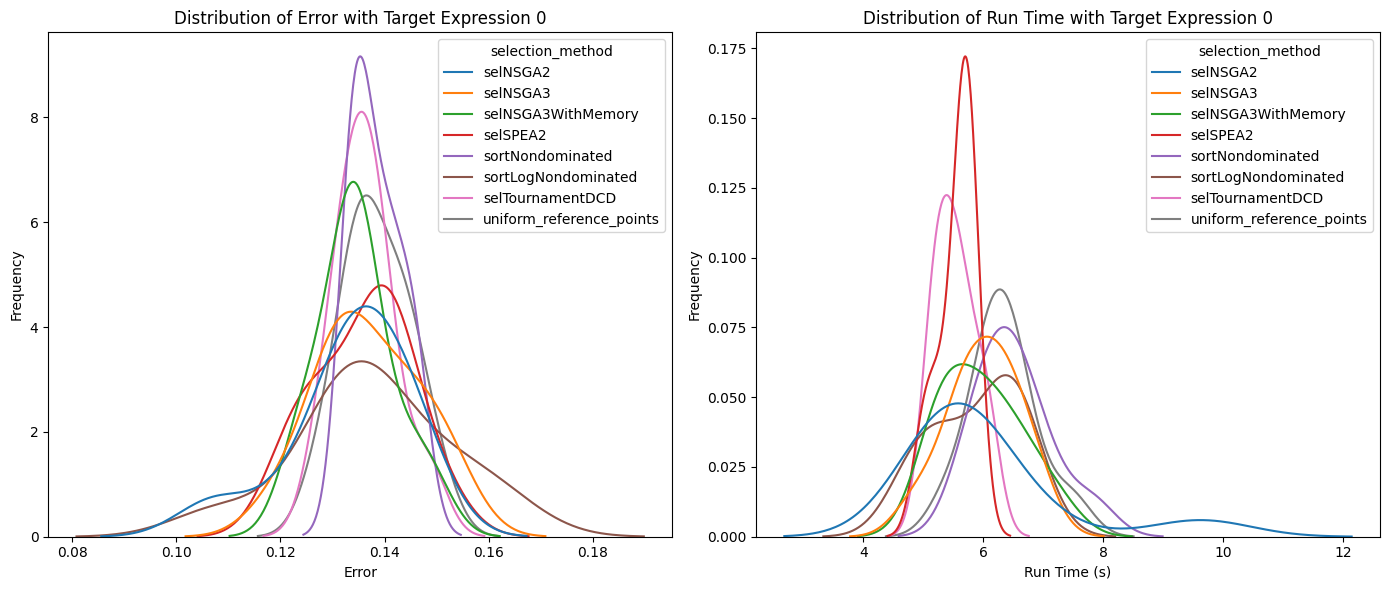

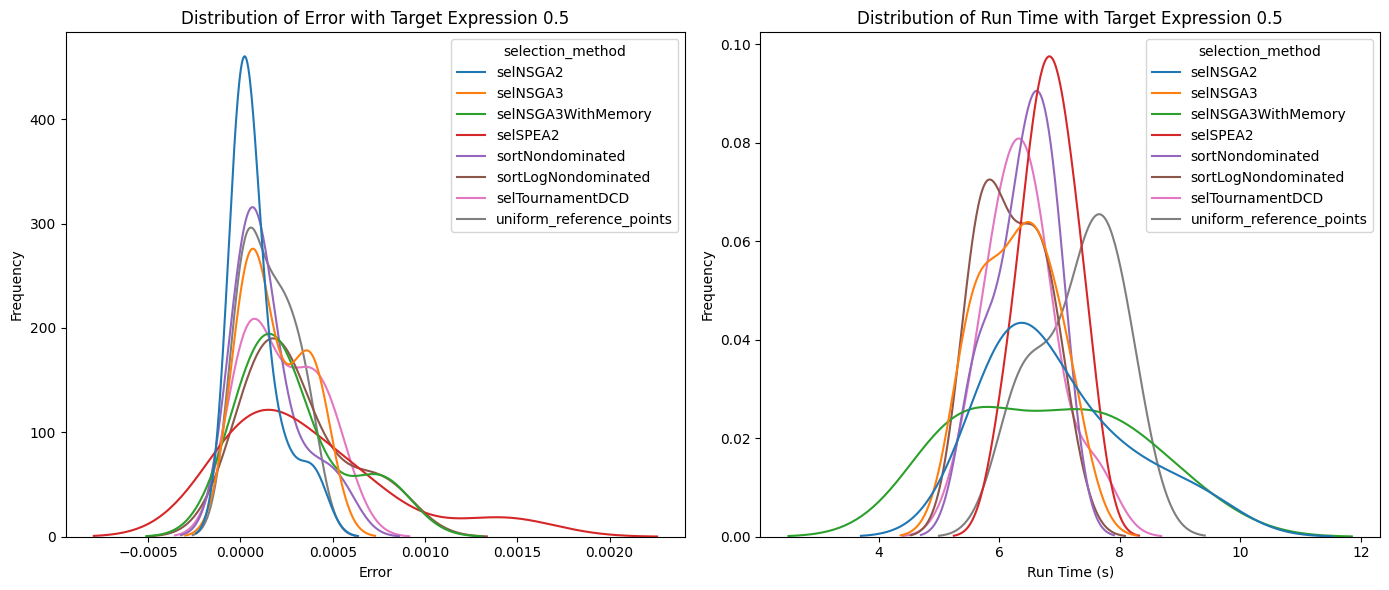

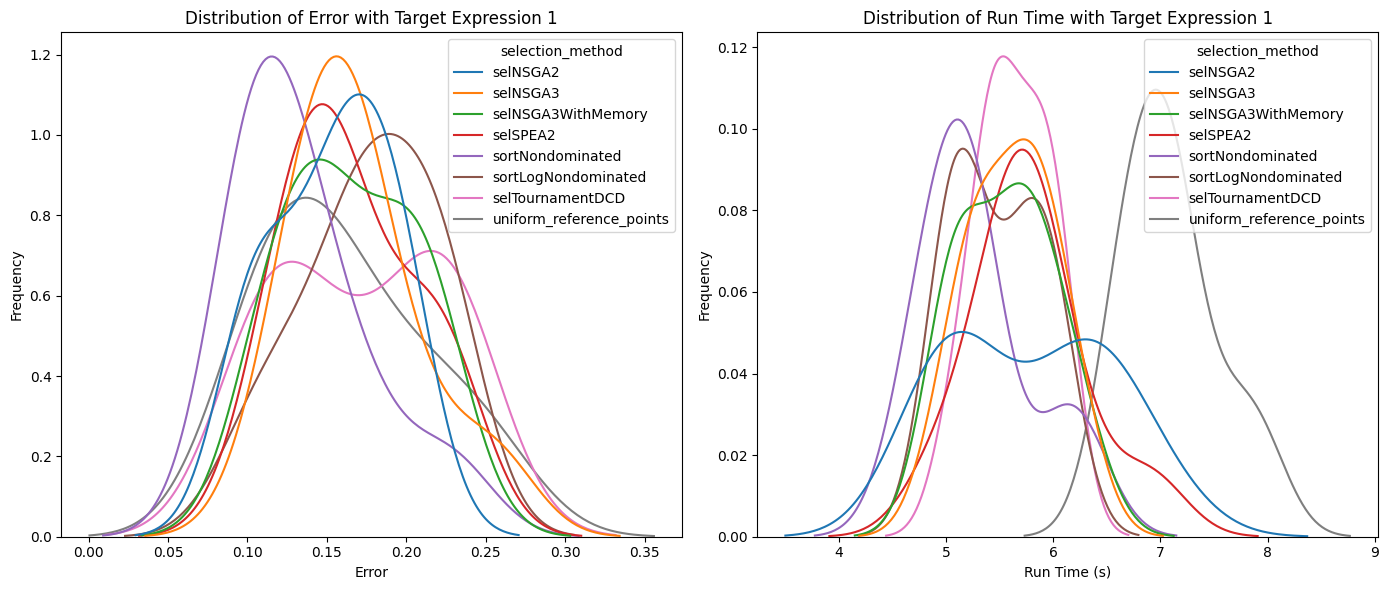

In [4]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filtered_df, target_expression, 'selection_method')